In [1]:
%pip install tensorflow

import tensorflow as tf


Could not find platform independent libraries <prefix>

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=20

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("Medicinal plant dataset",
                                                    shuffle=True,
                                                    image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE)

Found 5945 files belonging to 40 classes.


In [4]:
class_names=dataset.class_names
class_names

['Aloevera',
 'Amla',
 'Amruta_Balli',
 'Arali',
 'Ashoka',
 'Ashwagandha',
 'Avacado',
 'Bamboo',
 'Basale',
 'Betel',
 'Betel_Nut',
 'Brahmi',
 'Castor',
 'Curry_Leaf',
 'Doddapatre',
 'Ekka',
 'Ganike',
 'Gauva',
 'Geranium',
 'Henna',
 'Hibiscus',
 'Honge',
 'Insulin',
 'Jasmine',
 'Lemon',
 'Lemon_grass',
 'Mango',
 'Mint',
 'Nagadali',
 'Neem',
 'Nithyapushpa',
 'Nooni',
 'Pappaya',
 'Pepper',
 'Pomegranate',
 'Raktachandini',
 'Rose',
 'Sapota',
 'Tulasi',
 'Wood_sorel']

In [5]:
len(dataset)

186

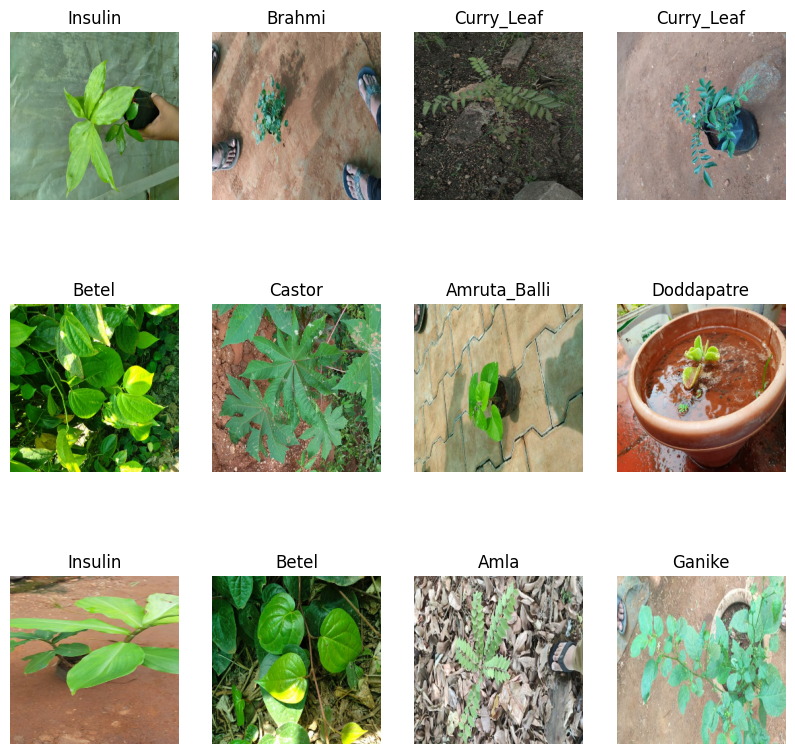

In [6]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(2):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [7]:
train_size=0.8
len(dataset)*train_size


148.8

In [8]:
train_ds=dataset.take(54)
len(train_ds)

54

In [9]:
test_ds=dataset.skip(54) 
len(test_ds)

132

In [10]:
val_size=0.1
len(dataset)*val_size

18.6

In [11]:
val_ds=dataset.take(6)
len(val_ds)

6

In [12]:
test_ds=test_ds.skip(6)
len(test_ds)

126

In [13]:
#create a dataset for spliting dataset int train test and valid

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    ds_size = len(ds)
    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)

    return train_ds, val_ds, test_ds

In [14]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [15]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)   #using for increasing the performance
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
#Resize and Rescaling the given image
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [17]:
#Augement the data to get the rotated and flip data of a image to make the prediction accurate

data_agumentation=tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])


In [18]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=150

model=models.Sequential([
    resize_and_rescale,
    data_agumentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')

])

model.build(input_shape=input_shape)

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics='accuracy'
)

In [21]:
try:
    # Your code here
    history = model.fit(train_ds, 
                        batch_size=BATCH_SIZE, 
                        epochs=EPOCHS, 
                        verbose=1, 
                        validation_data=val_ds)
except Exception as e:
    print(f"An error occurred: {e}")


Epoch 1/20


148/148 [==============================] - 3045s 16s/step - loss: 3.9575 - accuracy: 0.0222 - val_loss: 3.7416 - val_accuracy: 0.0226
Epoch 2/20
148/148 [==============================] - 808s 5s/step - loss: 3.7092 - accuracy: 0.0336 - val_loss: 3.6069 - val_accuracy: 0.0521
Epoch 3/20
148/148 [==============================] - 359s 2s/step - loss: 3.4999 - accuracy: 0.0586 - val_loss: 3.5012 - val_accuracy: 0.0451
Epoch 4/20
148/148 [==============================] - 423s 3s/step - loss: 3.3130 - accuracy: 0.0814 - val_loss: 3.3132 - val_accuracy: 0.0990
Epoch 5/20
148/148 [==============================] - 313s 2s/step - loss: 3.0589 - accuracy: 0.1288 - val_loss: 2.9008 - val_accuracy: 0.1406
Epoch 6/20
148/148 [==============================] - 335s 2s/step - loss: 2.8075 - accuracy: 0.1821 - val_loss: 2.7208 - val_accuracy: 0.2049
Epoch 7/20
148/148 [==============================] - 305s 2s/step - loss: 2.6393 - accuracy: 0.2239 - val_loss: 2.6032 - val_accuracy: 0.

In [22]:
scores=model.evaluate(test_ds)

20/20 [==============================] - 706s 5s/step - loss: 1.3226 - accuracy: 0.5938


In [23]:
scores

[1.3226497173309326, 0.59375]

In [24]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

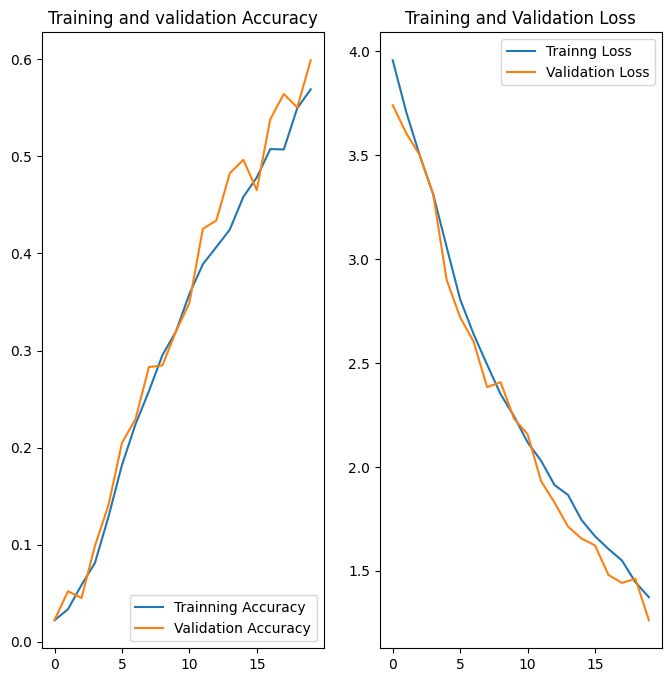

In [25]:
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)

plt.plot(range(EPOCHS),acc,label='Trainning Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and validation Accuracy')

plt.subplot(1,2,2)

plt.plot(range(EPOCHS),loss,label='Trainng Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')

plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


image to predict
first images actual label: Gauva
1/1 [==============================] - 12s 12s/step
predicted label: Gauva


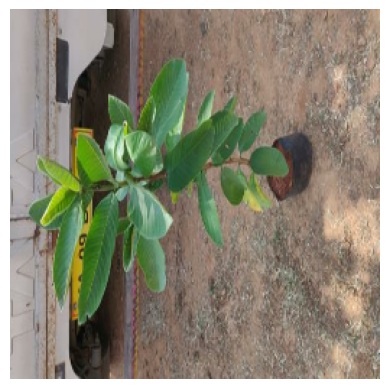

In [26]:


for images_batch,labels_batch in test_ds.take(1):
  first_image=images_batch[0].numpy().astype('uint8')
  first_label=(labels_batch[0]).numpy()

  print("image to predict")
  plt.imshow(first_image)
  plt.axis('off')
  print("first images actual label:",class_names[first_label])

  batch_prediction=model.predict(images_batch)
  print("predicted label:",class_names[np.argmax(batch_prediction[0])])



1/1 [==============================] - 0s 348ms/step


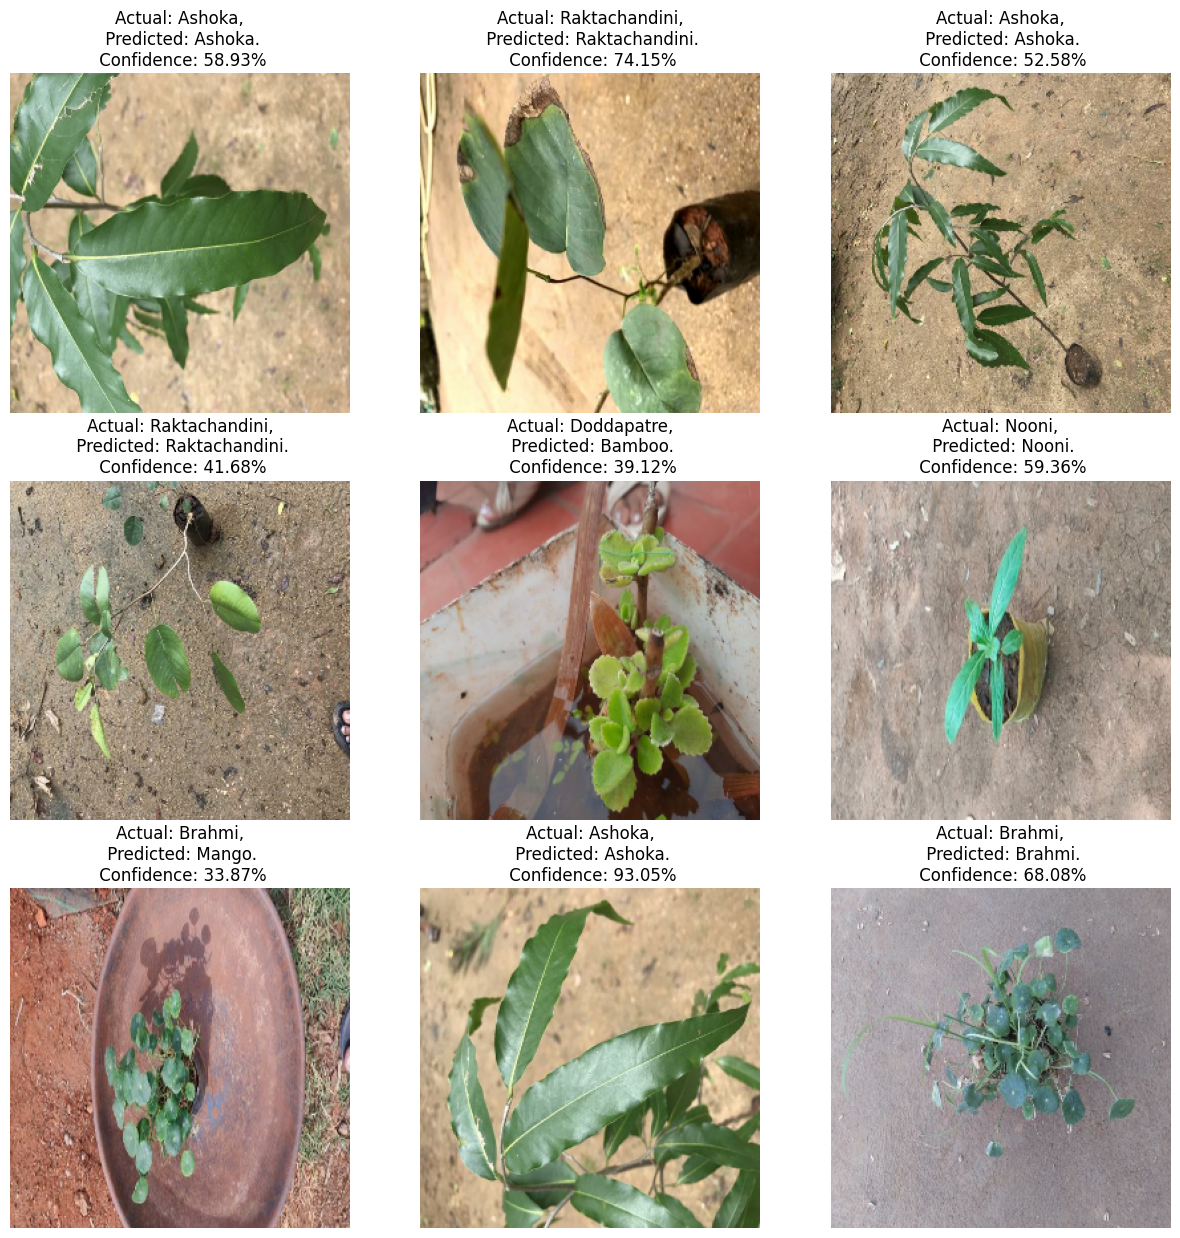

In [28]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        actual_class = class_names[labels[i]] 
        predictions = model.predict(images)
        predicted_class = class_names[np.argmax(predictions[i])]
        confidence = round(100 * (np.max(predictions[i])), 2)
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")